# 순환 신경망으로 IMDB리뷰 분류하기
+ 데이터셋 : IMDB 리뷰 데이터셋

리뷰를 감상평에 따라 긍정과 부정으로 구분 해 둔 데이터셋


In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words = 500)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))

218


In [4]:
print(len(train_input[1]))

189


In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
#타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [8]:
#각 리뷰의 길이 조사하기
import numpy as np
length = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(length), np.median(length))

239.00925 178.0


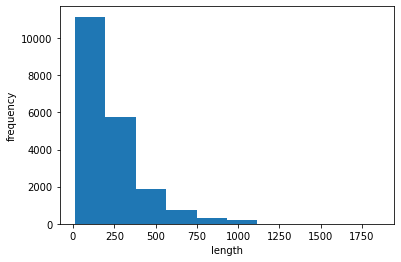

In [10]:
import matplotlib.pyplot as plt
plt.hist(length)
plt.ylabel('frequency')
plt.xlabel('length')
plt.show()

In [11]:
#각각 길이가 다른 리뷰를 길이가 100인 데이터로 전처리 하기 위한 함수
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen = 100)

In [12]:
train_seq.shape

(20000, 100)

In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][:10])
print(train_input[0][-10:])

#리뷰의 앞부분을 짤라 길이를 맞춘 것을 확인가능.

[1, 73, 89, 81, 25, 60, 2, 6, 20, 141]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
val_seq = pad_sequences(val_input, maxlen = 100)

### 원핫 인코딩 방법

In [16]:
from tensorflow.keras import layers
from tensorflow import keras
model = keras.Sequential()
model.add(layers.SimpleRNN(8, input_shape= (100, 500)))
#100 = 샘플의 개수, 500은 각 단어의 원핫인코딩 결과 (단어를 총 500개만 가져오기로 했음)
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
print(train_oh.shape)

(20000, 100, 500)


In [19]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [22]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
history = model.fit(train_oh, train_target, epochs = 100, batch_size = 64, validation_data = (val_oh, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 41ms/step - loss: 0.6995 - acc: 0.5082 - val_loss: 0.6980 - val_acc: 0.5156
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6932 - acc: 0.5241 - val_loss: 0.6934 - val_acc: 0.5252
Epoch 3/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6882 - acc: 0.5383 - val_loss: 0.6893 - val_acc: 0.5404
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.6833 - acc: 0.5585 - val_loss: 0.6846 - val_acc: 0.5522
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.6758 - acc: 0.5828 - val_loss: 0.6738 - val_acc: 0.5846
Epoch 6/100
313/313 [==============================] - 13s 40ms/step - loss: 0.6438 - acc: 0.6413 - val_loss: 0.6311 - val_acc: 0.6590
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6115 - acc: 0.6794 - val_loss: 0.6120 - val_acc: 0.6726
Epoch 8/100
313/313 [==============================] - 

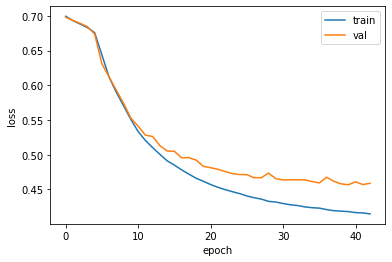

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

###단어 임베딩 방법

In [24]:
model2 = keras.Sequential()
model2.add(layers.Embedding(500, 16,input_length = 100))
model2.add(layers.SimpleRNN(8))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics=['acc'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
model2.fit(train_seq, train_target, validation_data = (val_seq, val_target), epochs = 100, batch_size = 64, callbacks= [early_stopping_cb, checkpoint_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6975 - acc: 0.5000 - val_loss: 0.6947 - val_acc: 0.5078
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6913 - acc: 0.5248 - val_loss: 0.6910 - val_acc: 0.5212
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6861 - acc: 0.5542 - val_loss: 0.6868 - val_acc: 0.5480
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6786 - acc: 0.5889 - val_loss: 0.6774 - val_acc: 0.5902
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6466 - acc: 0.6629 - val_loss: 0.6266 - val_acc: 0.6866
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6051 - acc: 0.7143 - val_loss: 0.5939 - val_acc: 0.7190
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5708 - acc: 0.7424 - val_loss: 0.5613 - val_acc: 0.7488
Epoch 8/100
313/313 [==============================] - 6s 21ms

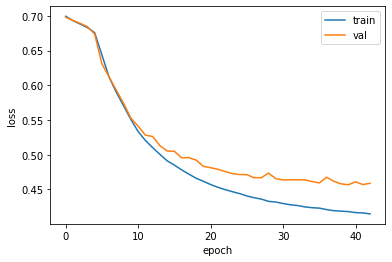

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()